<a id="1"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:4px 4px;">Natural Languague Processing </p>

### Natural Language Processing or NLP
+ It is a branch of AI which deal with enabling the machines understand humans in their Natural Language. 
+ Natural Language can be in form of text or sound, which are used for humans to communicate each other. 
+ NLP can enable humans to communicate to machines in a natural way.

### Text Classification
+ It is a process involved in Sentiment Analysis. 
+ It is classification of peoples opinion or expressions into different sentiments. 
+ Sentiments includes joy, sadness, anger, fear, love and surprise 

### About datasets
+ Collection of sentences and large paragraphs covering emotions like joy, sadness, anger, fear, love and surprise.
+ https://www.kaggle.com/praveengovi/emotions-dataset-for-nlp?select=test.txt

### Project Objective : 
+ To develop an ML algorithm to detect different types of emotion contained in a collection of sentences or a large paragraph.   

<a id="1"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:4px 4px;">Table of Contents</p>

### 1. Important libraries
### 2. Importing data and its integration
   + Importing all the datasets (Train, Test, Validation) from Kaggle.com 
   + Concatenating all the datasets 
   
### 3. Text and target variables visualization
   + Visualizing number of words, average number of words, number of characters in a single text using Histogram, Violin and Boxplot
   + Visualizing common stopwords, punctuations, common words in a text
   + N-gram analysis of text (Unigram, Bi-gram and Tri-gram)
   
### 4. Text preprocessing
   + Removing the duplicated and null data
   + Tokenization of Text data
   + Removing URLs, HTML tags, emojis, punctuations and Stopwords from the Text
   + Stemming and Lemmatization of the Text data
   + Word Cloud Model for visualization of the words
   + Creating Bag of words
   + N-gram to capture the importance of the words
   + TFIDF ( Term frequency and Inverse Document Frequency Vector )
   + Splitting the Cleaned data into Train (Train and validation sets when hyperparameter tuning) Test sets
   
### 5. Model Bulding
   + Light GBM
      + Accuracy : 87 %
      
   + CatBoost
      + Accuracy : 87.0 %

<a id="1"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:4px 4px;">Important libraries</p>

In [1]:
import numpy as np 
import pandas as pd
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords
import nltk
from collections import defaultdict
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.metrics import confusion_matrix, r2_score, accuracy_score, precision_score, recall_score, f1_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from numpy import mean,std
from sklearn.feature_selection import SelectKBest,f_regression
from sklearn.base import BaseEstimator,clone,TransformerMixin,RegressorMixin
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import RepeatedStratifiedKFold,cross_val_score,RandomizedSearchCV,GridSearchCV
from pprint import pprint
from sklearn import tree

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder 
from nltk.stem.porter import PorterStemmer

In [2]:
# Stop warnings
import warnings
warnings.filterwarnings("ignore")

<a id="1"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:4px 4px;">1. Importing the Dataset</p>

## Data Integration

+ Importing datasets
+ Concatenating all the Datasets (Train, Test, Validation)

In [3]:
train_data = pd.read_csv('train.txt',names=['Text','Emotions'],header=None, sep=';')
test_data  = pd.read_csv('test.txt',names=['Text','Emotions'],header=None, sep=';')
val_data   = pd.read_csv('val.txt',names=['Text','Emotions'],header=None, sep=';')

Data = pd.concat([train_data,test_data, val_data])
Data.head()

Text Emotions
0                            i didnt feel humiliated  sadness
1  i can go from feeling so hopeless to so damned...  sadness
2   im grabbing a minute to post i feel greedy wrong    anger
3  i am ever feeling nostalgic about the fireplac...     love
4                               i am feeling grouchy    anger

In [4]:
Data.shape

(20000, 2)

<a id="1"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">2. Visualization of the data</p>

## 2.1 Target Variable of the data

In [5]:
attributes = Data.keys()
attributes[-1]

'Emotions'

## 2.2 Counting number of emotions

In [6]:
Data['Emotions'].value_counts()

joy         6761
sadness     5797
anger       2709
fear        2373
love        1641
surprise     719
Name: Emotions, dtype: int64

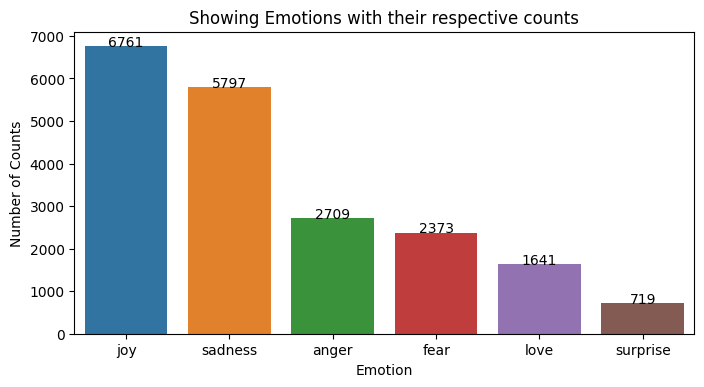

In [7]:
dfN_emotion = Data.Emotions.value_counts()
df = pd.DataFrame(dfN_emotion)

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')
        
Code = ['joy','sadness','anger','fear','love','surprise']
plt.figure(figsize=(8,4),dpi=100)
sns.barplot(Code,dfN_emotion)
addlabels(Code,dfN_emotion)
plt.xlabel("Emotion")
plt.ylabel("Number of Counts")
plt.title(f"Showing Emotions with their respective counts")
plt.show()

In [8]:
Data['Text_Length'] = Data['Text'].apply(lambda x: len(x.split(' ')))
Data.head()
max(Data['Text_Length'])

66

In [9]:
min(Data['Text_Length'])

2

+ Maximum number of words in a text is 66
+ Minimum number of words in a text is 2

## 2.3.1 Counting Number of words in a Text

### Histogram plot

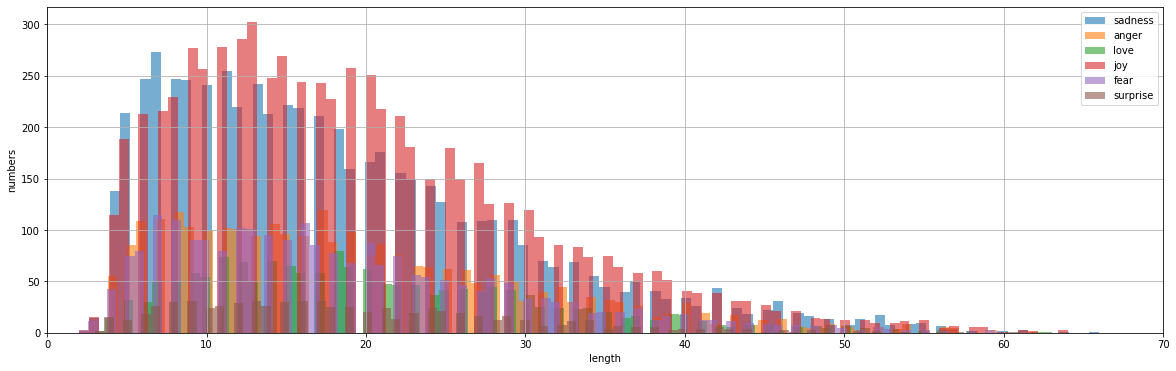

In [10]:
plt.rcParams['figure.figsize'] = (20.0, 6.0)
bins = 100
plt.hist(Data[Data['Emotions'] == 'sadness']['Text_Length'], alpha = 0.6, bins=bins, label='sadness')
plt.hist(Data[Data['Emotions'] == 'anger']['Text_Length'], alpha = 0.6, bins=bins, label='anger')
plt.hist(Data[Data['Emotions'] == 'love']['Text_Length'], alpha = 0.6, bins=bins, label='love')
plt.hist(Data[Data['Emotions'] == 'joy']['Text_Length'], alpha = 0.6, bins=bins, label='joy')
plt.hist(Data[Data['Emotions'] == 'fear']['Text_Length'], alpha = 0.6, bins=bins, label='fear')
plt.hist(Data[Data['Emotions'] == 'surprise']['Text_Length'], alpha = 0.6, bins=bins, label='surprise')

plt.xlabel('length')
plt.ylabel('numbers')
plt.legend(loc='upper right')
plt.xlim(0,70)
plt.grid()
plt.show()

### Violin and Boxplot

<AxesSubplot: xlabel='Emotions', ylabel='Text_Length'>

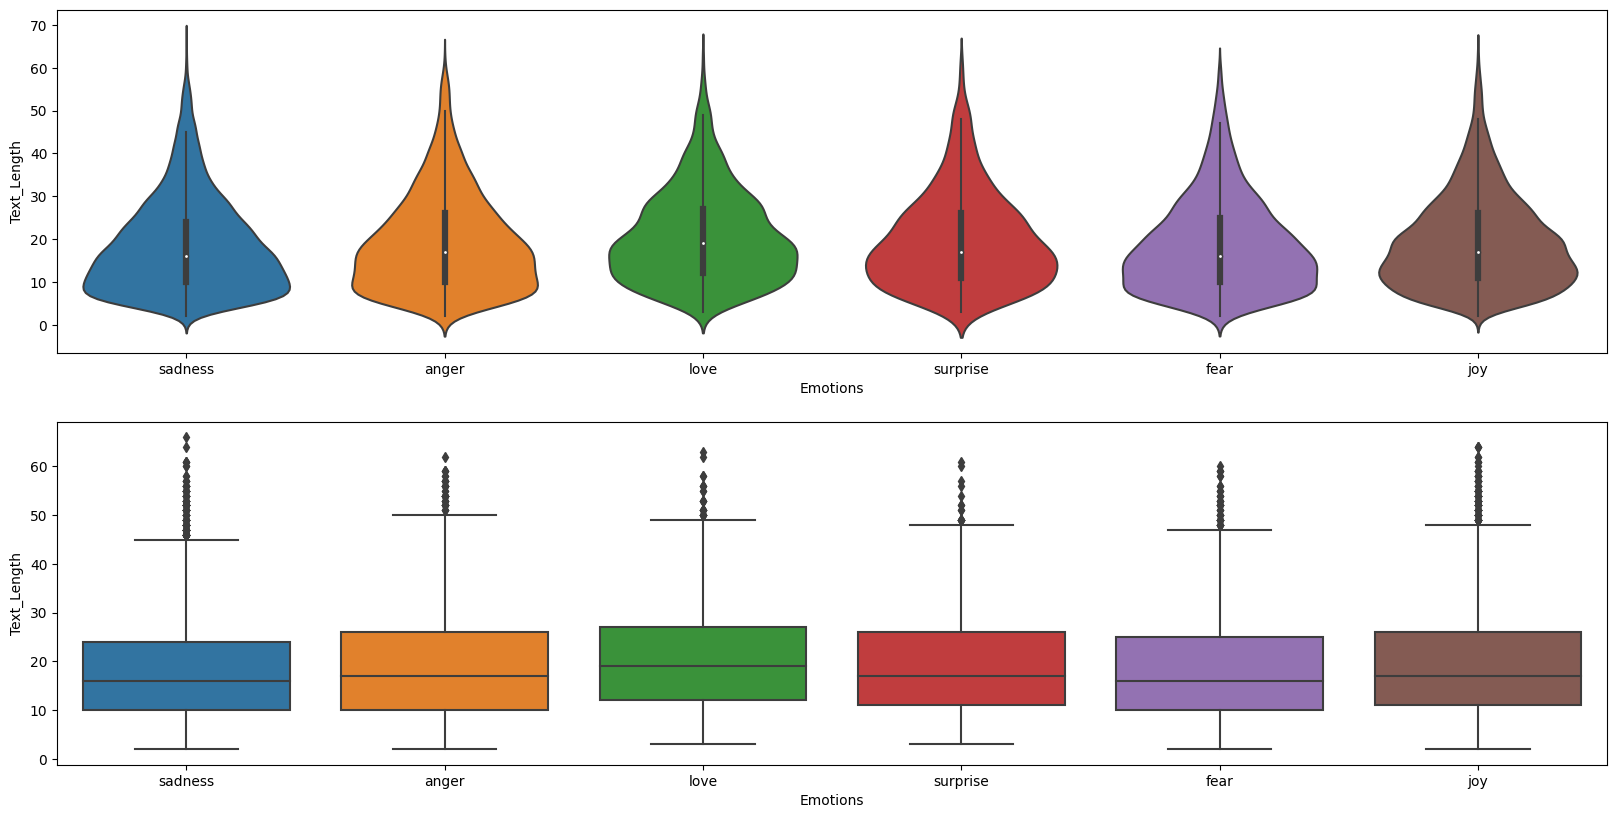

In [11]:
plt.figure(figsize=(20,10),dpi=100)
plt.subplot(2,1,1)
sns.violinplot(Data['Emotions'],Data['Text_Length'])
plt.subplot(2,1,2)
sns.boxplot(Data['Emotions'],Data['Text_Length'])

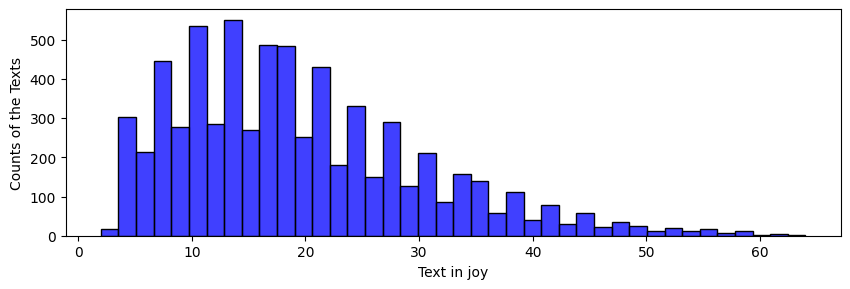

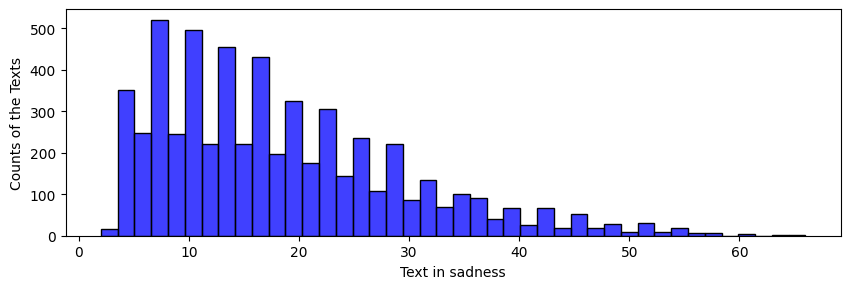

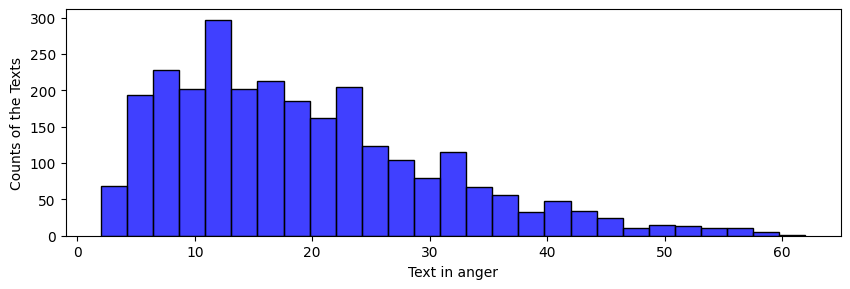

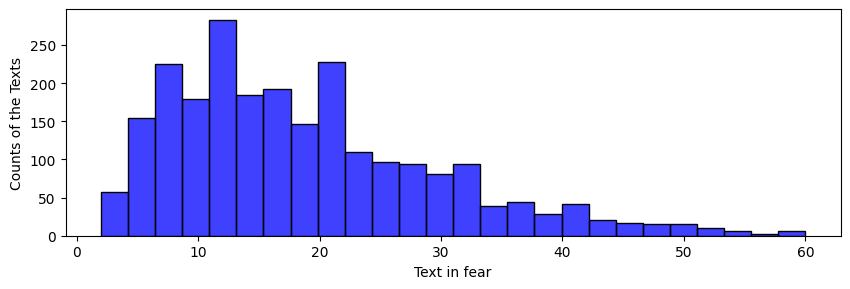

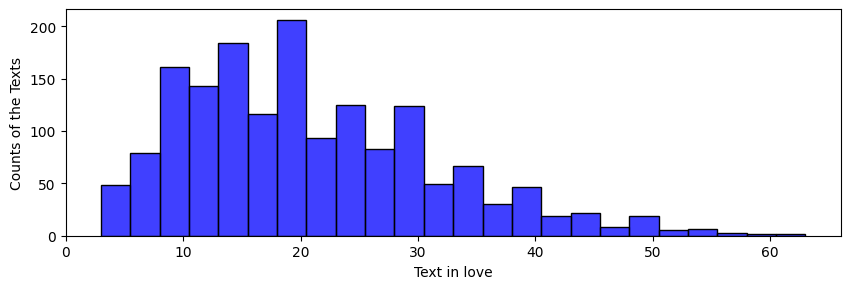

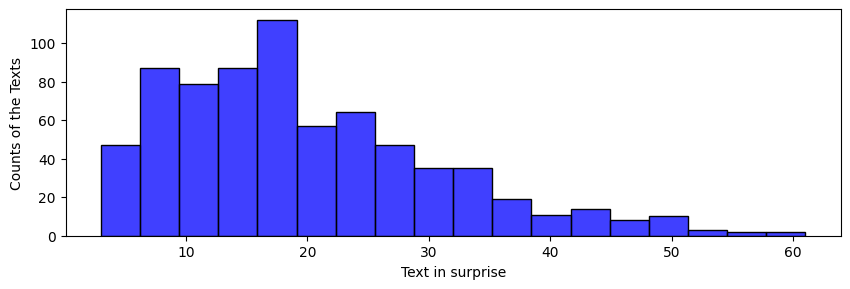

In [12]:
EM = ['joy','sadness','anger','fear','love','surprise']
for i in range(len(EM)):
    emotions = EM[i]
    plt.figure(figsize=(10,3),dpi=100)
    Text_Length = Data[Data['Emotions']==f'{emotions}']['Text'].str.split().map(lambda x: len(x))
    sns.histplot(Text_Length,color='blue')
    plt.xlabel(f'Text in {emotions}')
    plt.ylabel(f'Counts of the Texts')

### Average number of words in a single text

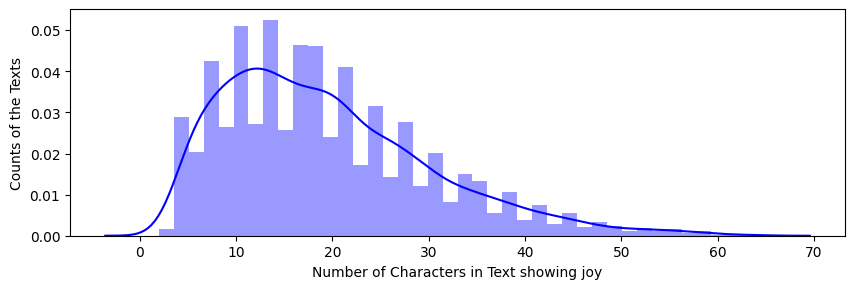

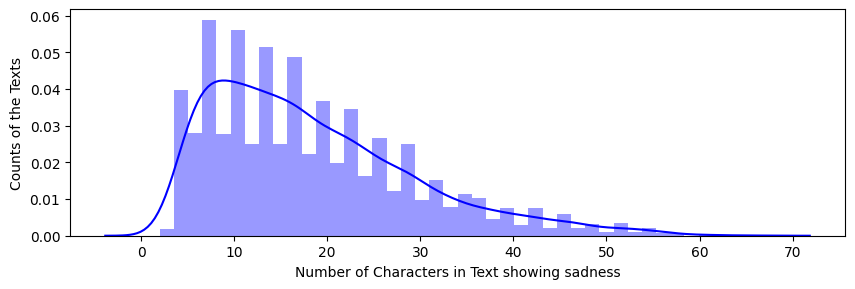

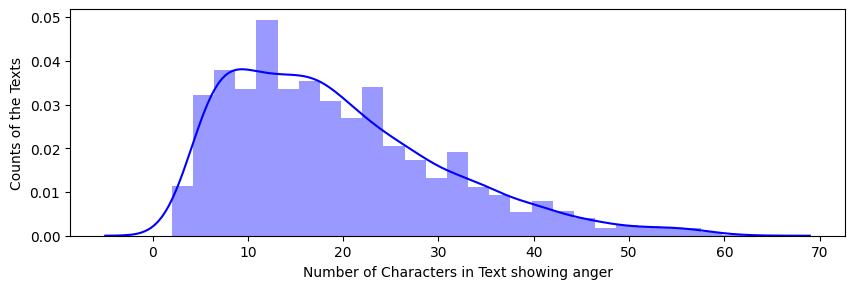

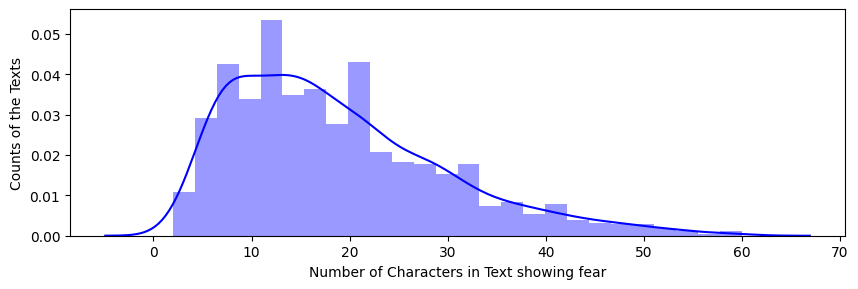

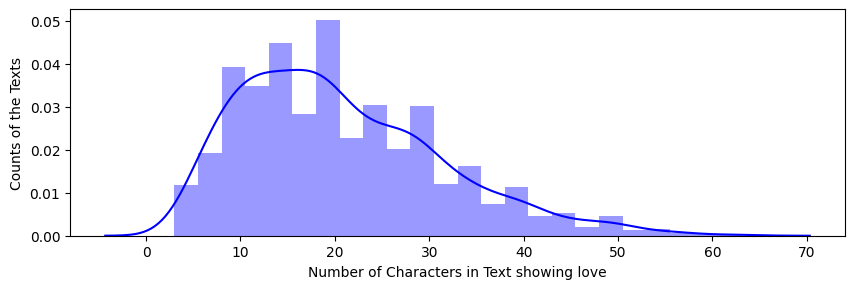

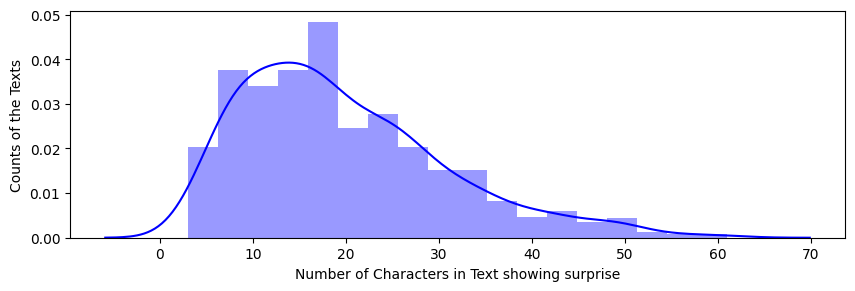

In [13]:
for i in range(len(EM)):
    emotions = EM[i]
    plt.figure(figsize=(10,3),dpi=100)
    Text_Length = Data[Data['Emotions']==f'{emotions}']['Text'].str.split().map(lambda x: len(x))
    sns.distplot(Text_Length,color='blue')
    plt.xlabel(f'Number of Characters in Text showing {emotions}')
    plt.ylabel(f'Counts of the Texts')

## 2.3.2 Counting Number of Characters in a Text

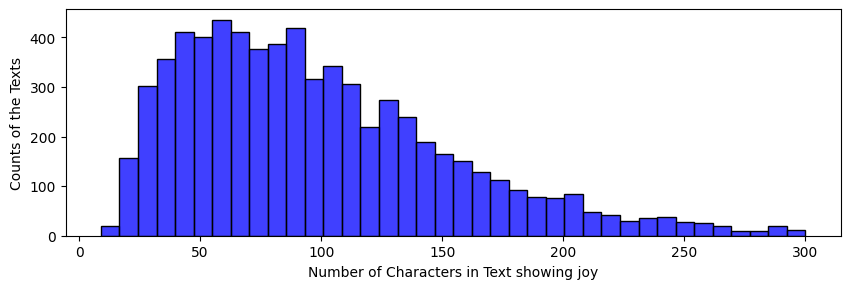

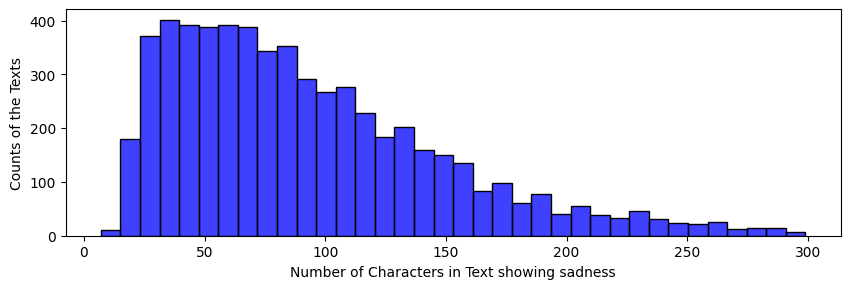

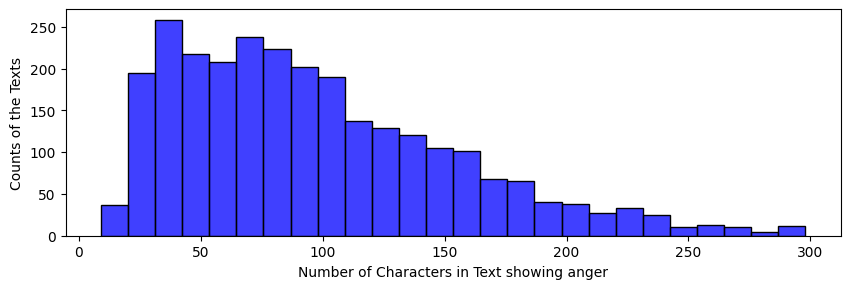

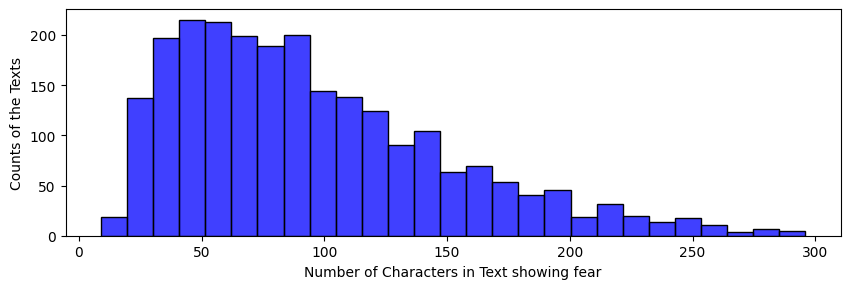

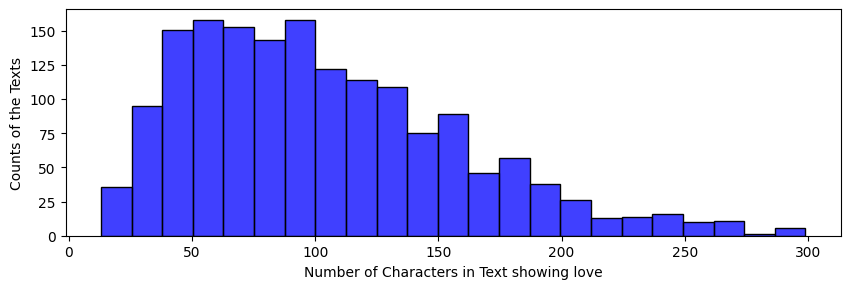

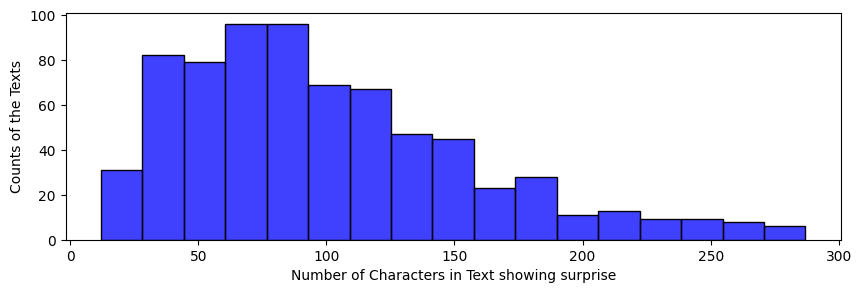

In [14]:
EM = ['joy','sadness','anger','fear','love','surprise']
for i in range(len(EM)):
    emotions = EM[i]
    plt.figure(figsize=(10,3),dpi=100)
    Text_Length = Data[Data['Emotions']==f'{emotions}']['Text'].str.len()
    sns.histplot(Text_Length,color='blue')
    plt.xlabel(f'Number of Characters in Text showing {emotions}')
    plt.ylabel(f'Counts of the Texts')

###  Average number of characters in a single text

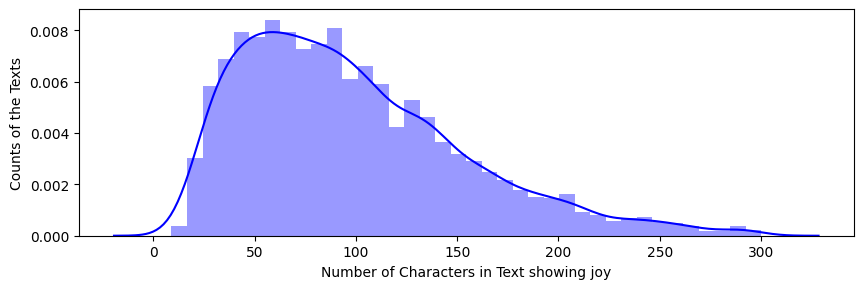

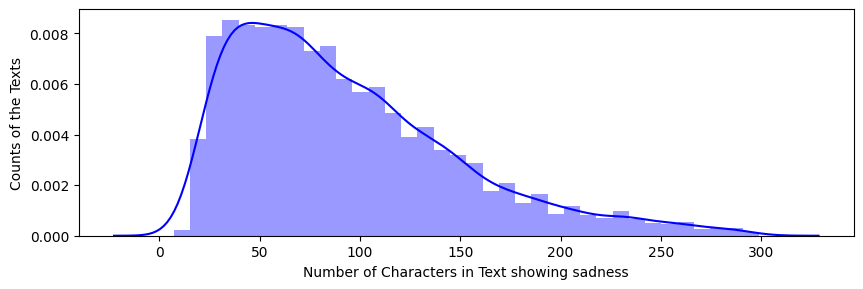

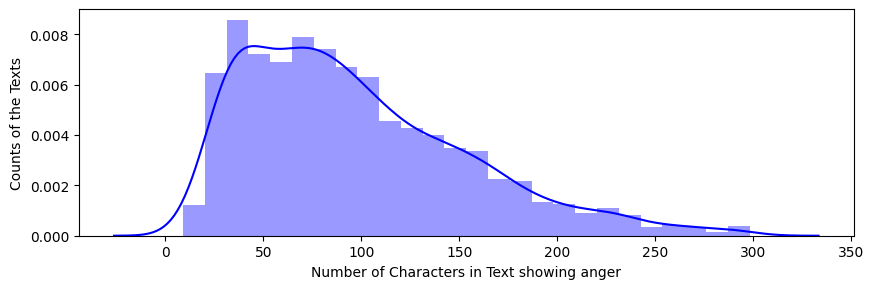

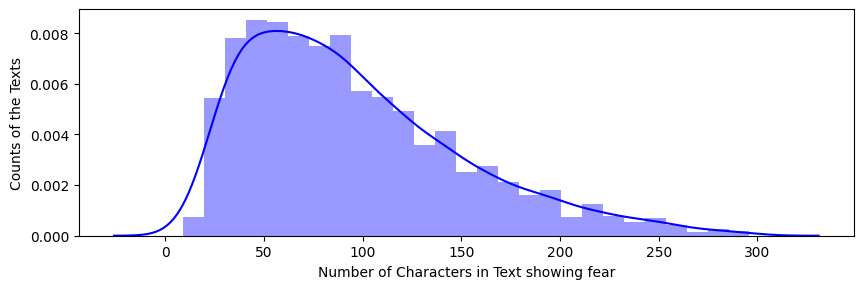

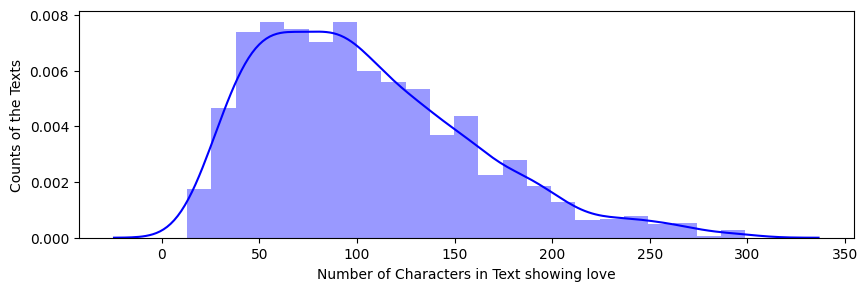

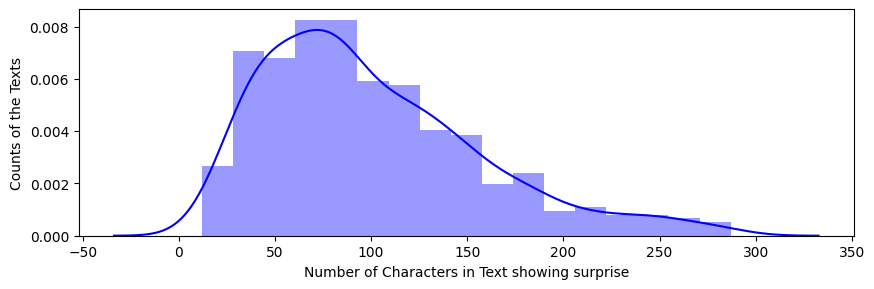

In [15]:
for i in range(len(EM)):
    emotions = EM[i]
    plt.figure(figsize=(10,3),dpi=100)
    Text_Length = Data[Data['Emotions']==f'{emotions}']['Text'].str.len()
    sns.distplot(Text_Length,color='blue')
    plt.xlabel(f'Number of Characters in Text showing {emotions}')
    plt.ylabel(f'Counts of the Texts')

## 2.3.3 Common stopwords in a text

In [16]:
def create_corpus(emotion):
    corpus=[]
    for x in Data[Data['Emotions']==emotion]['Text'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

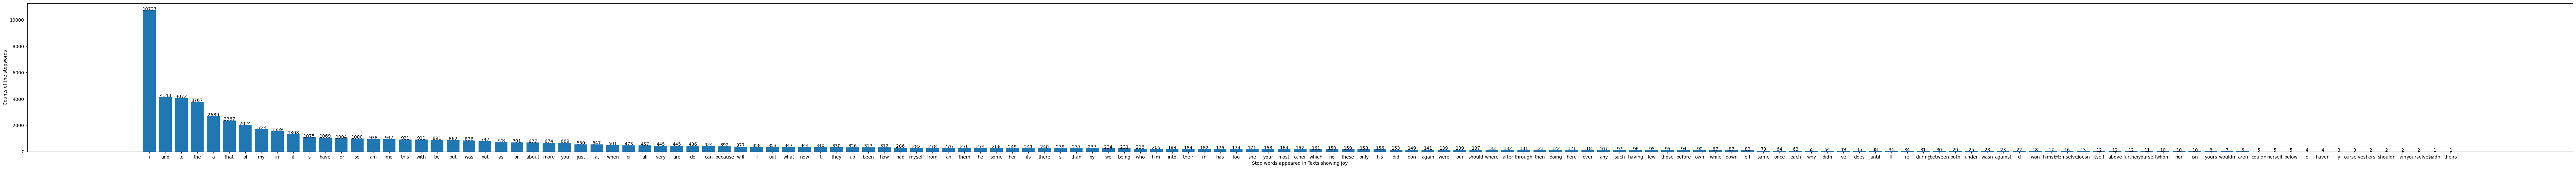

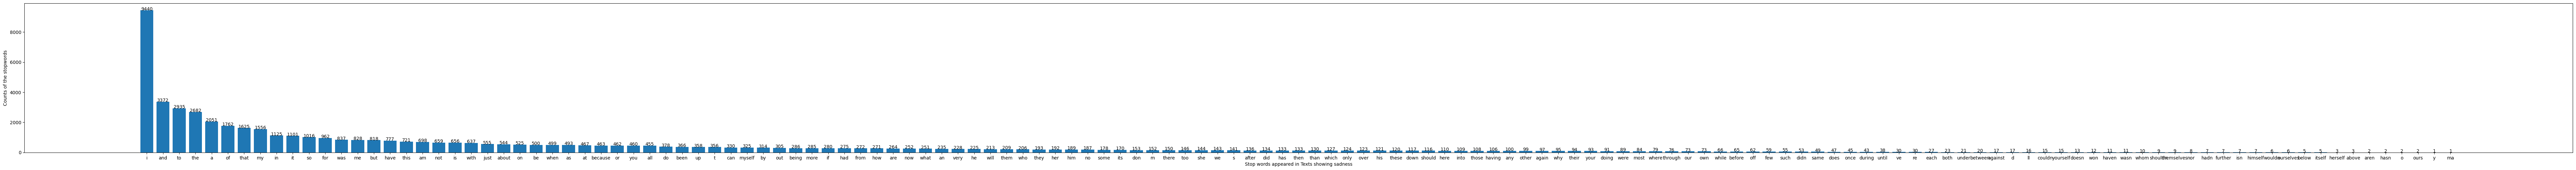

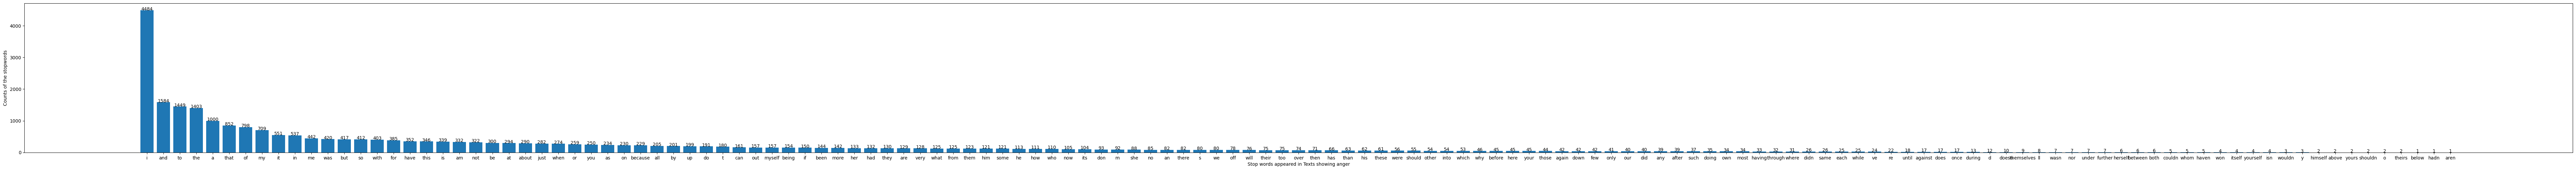

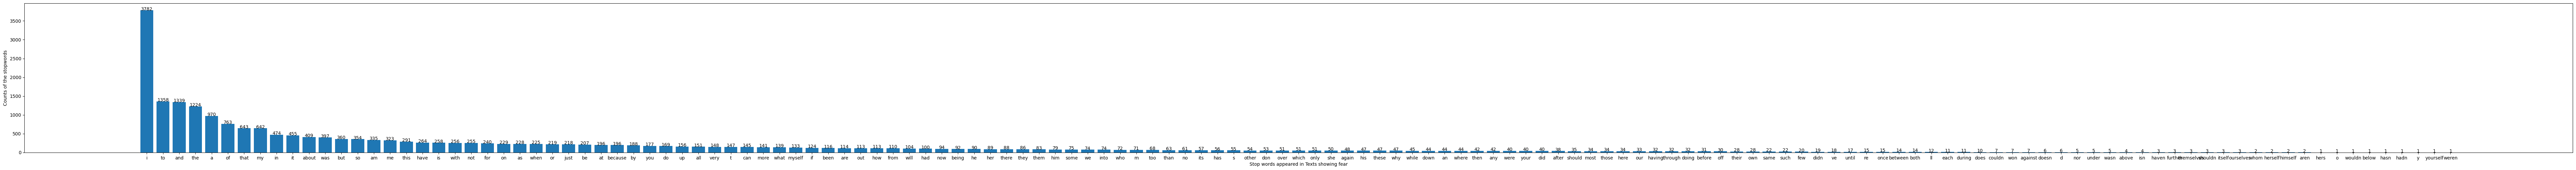

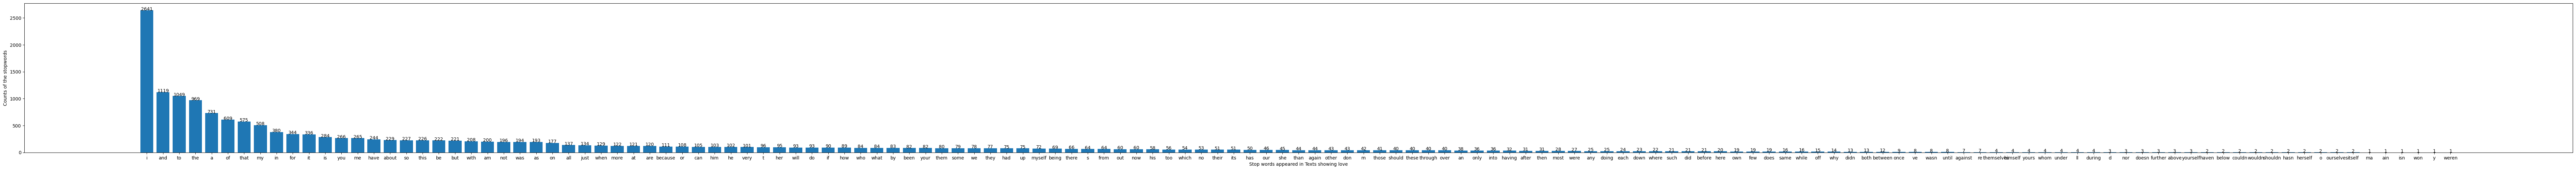

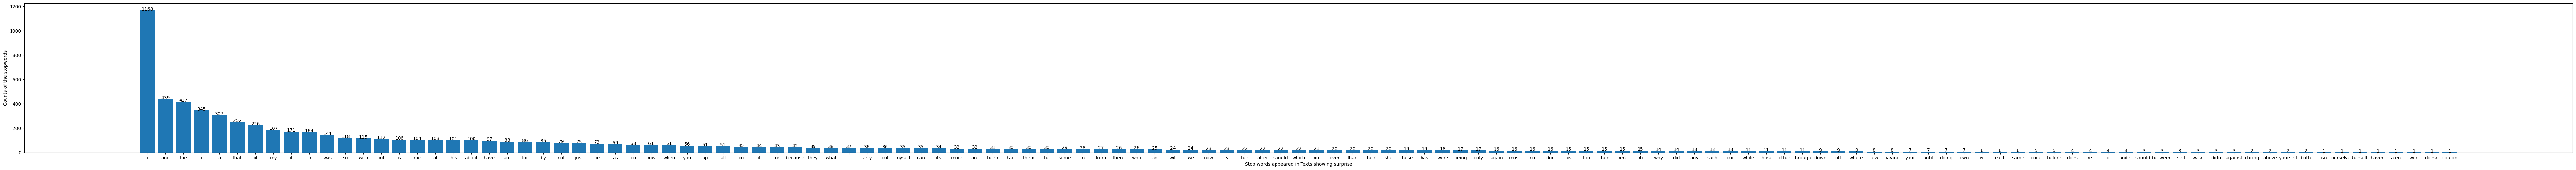

In [17]:
for i in range(len(EM)):
    emotions = EM[i]
    stop_words = stopwords.words('english')

    corpus = create_corpus(f'{emotions}')
    dic    = defaultdict(int)
    for word in corpus:
        if word in stop_words:
            dic[word]+=1
    stop_words = sorted(dic.items(), key=lambda x:x[1],reverse=True)[:]
    x,y=zip(*stop_words)
    
    plt.figure(figsize=(100,6),dpi=100)
    plt.bar(x,y)
    addlabels(x,y)
    plt.xlabel(f'Stop words appeared in Texts showing {emotions}')
    plt.ylabel(f'Counts of the stopwords')

+ In all the texts containing different emotions we can see that stopwords 'I', 'and', 'the' and 'to' frequently occured

## 2.4 Analyzing punctuations

In [18]:
for i in range(len(EM)):
    emotions = EM[i]
    stop_words = stopwords.words('english')

    corpus = create_corpus(f'{emotions}')
    dic    = defaultdict(int)
    special = string.punctuation
    for word in corpus:
        if word in special:
            dic[word]+=1
    print(dic)

defaultdict(<class 'int'>, {})
defaultdict(<class 'int'>, {})
defaultdict(<class 'int'>, {})
defaultdict(<class 'int'>, {})
defaultdict(<class 'int'>, {})
defaultdict(<class 'int'>, {})


+ No punctuations are present

###  Counting punctuations

In [19]:
special

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [18]:
Text = Data['Text']

In [21]:
for j in range(len(special)):
    Number_of_Counts = 0
    for i in range(len(Data['Text'])):
        Text_i = np.array(Data['Text'])[i]
        New_Count = Text_i.count(special[j])
        Number_of_Counts = Number_of_Counts + New_Count
    print(f'Counts = {Number_of_Counts} for the {special[j]}')

Counts = 0 for the !
Counts = 0 for the "
Counts = 0 for the #
Counts = 0 for the $
Counts = 0 for the %
Counts = 0 for the &
Counts = 0 for the '
Counts = 0 for the (
Counts = 0 for the )
Counts = 0 for the *
Counts = 0 for the +
Counts = 0 for the ,
Counts = 0 for the -
Counts = 0 for the .
Counts = 0 for the /
Counts = 0 for the :
Counts = 0 for the ;
Counts = 0 for the <
Counts = 0 for the =
Counts = 0 for the >
Counts = 0 for the ?
Counts = 0 for the @
Counts = 0 for the [
Counts = 0 for the \
Counts = 0 for the ]
Counts = 0 for the ^
Counts = 0 for the _
Counts = 0 for the `
Counts = 0 for the {
Counts = 0 for the |
Counts = 0 for the }
Counts = 0 for the ~


## 2.5 Common words

In [19]:
counter = Counter(corpus)
most    = counter.most_common()
x = []
y = []
for word,count in most[:]:
    if (word not in stop_words) :
        x.append(word)
        y.append(count)

<AxesSubplot: >

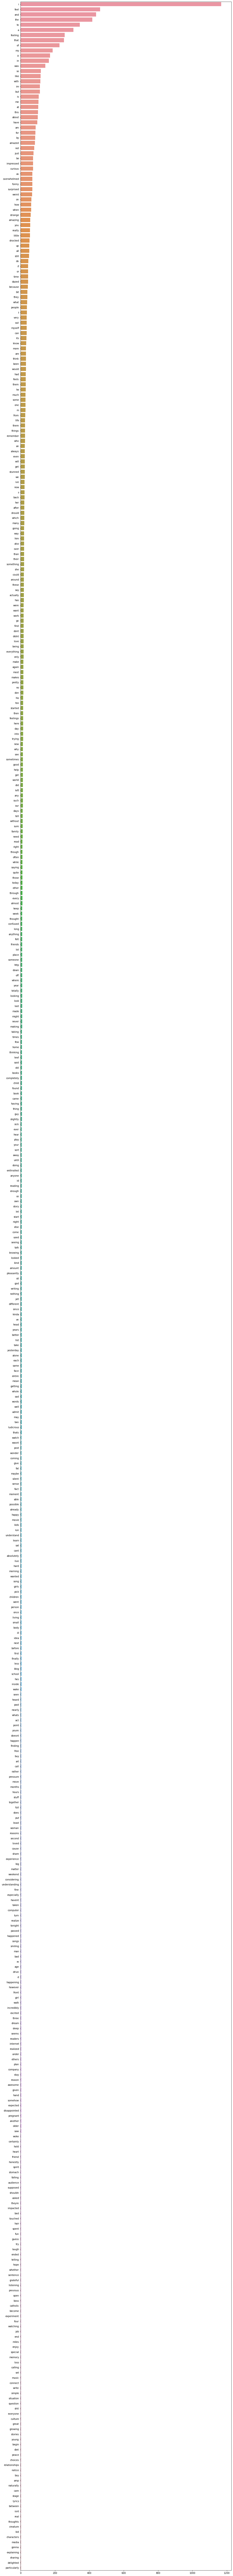

In [20]:
plt.figure(figsize=(16,200))
sns.barplot(x=y[:500],y=x[:500])

## 2.6 N-gram analysis

In [21]:
def get_top_text_trigrams(corpus, n=None):
    vec = TfidfVectorizer(ngram_range=(1,3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [22]:
top_text_trigrams = get_top_text_trigrams(Data['Text'])[:1000]
x,y=map(list,zip(*top_text_trigrams))

<AxesSubplot: >

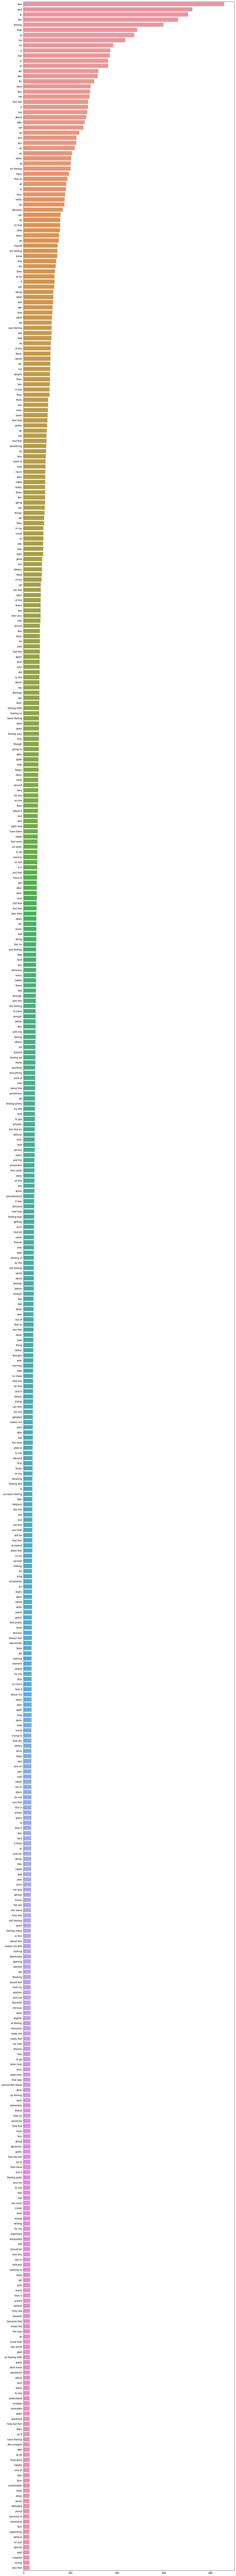

In [23]:
plt.figure(figsize=(16,200))
sns.barplot(x=y[:500],y=x[:500])

<a id="1"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">3. Text Preprocessing : Cleaning</p>

## Counts of non-null data and their types within the attributes

In [24]:
print(Data.info())
print(Data.isnull().sum().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Text         20000 non-null  object
 1   Emotions     20000 non-null  object
 2   Text_Length  20000 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 625.0+ KB
None
0


## Removing the duplicated data

In [25]:
print(Data.duplicated().sum())
Data = Data.drop_duplicates()
print(Data.duplicated().sum())

1
0


## Tokenization

+ Converting Paragraphs into different separate words and sentences

In [26]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ravi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [27]:
Text_Tokenized = []
for i in range(len(Data['Text'])):
    Text_tok = nltk.sent_tokenize(np.array(Data['Text'])[i])
    Text_Tokenized.append(Text_tok)

In [28]:
Text_Tokeniz = []
for i in range(len(Text_Tokenized)):
    Text_Tokeniz.append(Text_Tokenized[i][0])

In [29]:
Data['Text'] = Text_Tokeniz

## 3.1 Removing URLs from the Text 

In [30]:
def Remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

In [31]:
Data['Text'] = Data['Text'].apply(lambda x : Remove_URL(x))

## 3.2 Removing HTML tags

In [32]:
def Remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

In [33]:
Data['Text'] = Data['Text'].apply(lambda x : Remove_html(x))

## 3.3 Removing Emojis

In [34]:
def Remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [35]:
Data['Text'] = Data['Text'].apply(lambda x : Remove_emoji(x))

## 3.4 Removing punctuations

In [36]:
def Remove_punct(text):
    table = str.maketrans('','',string.punctuation)
    return text.translate(table)

In [37]:
Data['Text'] = Data['Text'].apply(lambda x : Remove_punct(x))

## 3.5 Removing Stopwords from the Text

In [38]:
Allstop_words = []
for i in range(len(EM)):
    emotions = EM[i]
    stop_words = stopwords.words('english')
    corpus = create_corpus(f'{emotions}')
    for word in corpus:
        if word in stop_words:
            if word not in Allstop_words:
                Allstop_words.append(word)

In [39]:
len(Allstop_words)

149

+ Remove 'not' from the stopwords as it can alter the emotion of expression

In [40]:
Allstop_words.remove('not')
len(Allstop_words)

148

+ import re
  + Library which provides regular expression matching operations to remove stopwords from our text.
  + It will not help to predict our text emotion like all the articles(the, a , an...)
+ import nltk
  + Downloading all the stopwords from the nltk library
    + nltk.download('stopwords')

+ Importing stopwords
  + from nltk.corpus import stopwords

In [41]:
Cleaned_Text = []
for i in range(len(Data)):
    Text1 = np.array(Data['Text'])[i]
    
    # Splitting the text into different words 
    Text1 = Text1.split()
    
    # Removing the stopwords from the Text
    Text2 = [word for word in Text1 if not word in set(Allstop_words)]
    
    # Joining all the words together seperating with space
    Text3 = ' '.join(Text2)
    
    # Adding the cleaned text to the empty list
    Cleaned_Text.append(Text3)

In [42]:
Cleaned_Text[0:10]

['didnt feel humiliated',
 'go feeling hopeless damned hopeful around someone cares awake',
 'im grabbing minute post feel greedy wrong',
 'ever feeling nostalgic fireplace know still property',
 'feeling grouchy',
 'ive feeling little burdened lately wasnt sure',
 'ive taking milligrams times recommended amount ive fallen asleep lot faster also feel like funny',
 'feel confused life teenager jaded year old man',
 'petronas years feel petronas performed well made huge profit',
 'feel romantic']

In [43]:
Data['Text'] = Cleaned_Text

## 3.6 Stemming of Text : It will convert all the words in their roots.

+ Example:
- loved as love
- helped as help
- hopes as hope

+ Reason: 
- As after cleaning the text when will create the bag of words model we will create sparse matrix with each column will have all the different words all having different emotions. So in order to optimize the dimension of the sparse matrix we need to apply stemming. If we don't apply the stemming then in sparse matrix we would have one column for present tense and other for the past tense that would be same thing so will create redundants and will make sparse matrix more complex with higher dimension. 

## Lemmatization

In [44]:
# # Stemming the text
# ps = PorterStemmer()
    
# Final_Cleaned_Text = []
# for i in range(len(Cleaned_Text)):
#     Text1 = Cleaned_Text[i]
    
#     # Transforming all the capital letters into lower case letters
#     Text1 = Text1.lower()
    
#     # Splitting the text into different words so that we can apply stemming
#     Text1 = Text1.split()
    
#     # Removing the stopwords from the Text
#     Text2 = [ps.stem(word) for word in Text1]
    
#     # Joining all the words together seperating with space
#     Text3 = ' '.join(Text2)
    
#     # Adding the cleaned text to the empty list
#     Final_Cleaned_Text.append(Text3)
#     Final_Cleaned_Text

In [45]:
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer()

In [46]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Ravi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [47]:
Final_Cleaned_Text = []
for i in range(len(Cleaned_Text)):
    Text1 = Cleaned_Text[i]
    
    # Transforming all the capital letters into lower case letters
    Text1 = Text1.lower()
    
    # Splitting the text into different words so that we can apply stemming
    Text1 = Text1.split()
    
    # Lemmatizing the words of the Text
    Text2 = [lemmatizer.lemmatize(word) for word in Text1]
    
    # Joining all the words together seperating with space
    Text3 = ' '.join(Text2)
    
    # Adding the cleaned text to the empty list
    Final_Cleaned_Text.append(Text3)

In [48]:
Final_Cleaned_Text[0:10]

['didnt feel humiliated',
 'go feeling hopeless damned hopeful around someone care awake',
 'im grabbing minute post feel greedy wrong',
 'ever feeling nostalgic fireplace know still property',
 'feeling grouchy',
 'ive feeling little burdened lately wasnt sure',
 'ive taking milligram time recommended amount ive fallen asleep lot faster also feel like funny',
 'feel confused life teenager jaded year old man',
 'petronas year feel petronas performed well made huge profit',
 'feel romantic']

In [49]:
Data['Text'] = Final_Cleaned_Text

## 3.7 Word Cloud

In [50]:
def create_corpus_df(Texts, emotion):
    corpus=[]
    for x in Texts[Texts['Emotions']==emotion]['Text'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

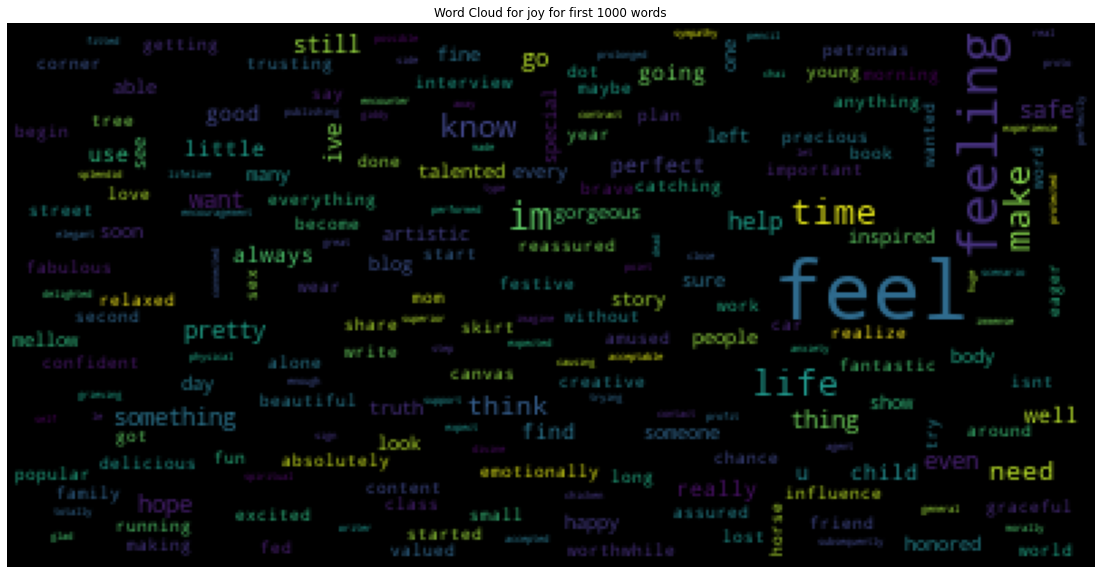

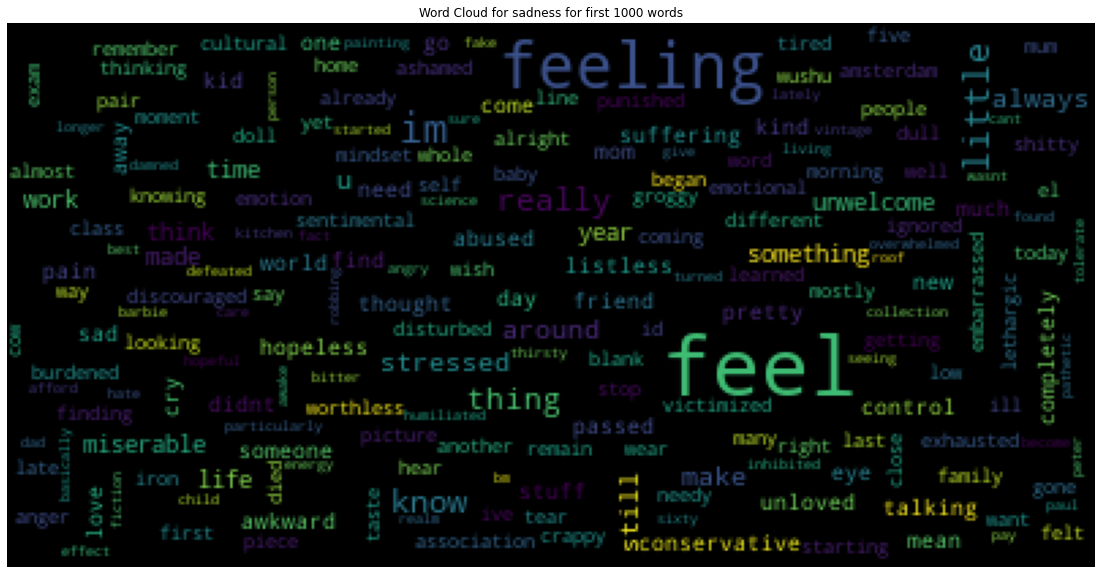

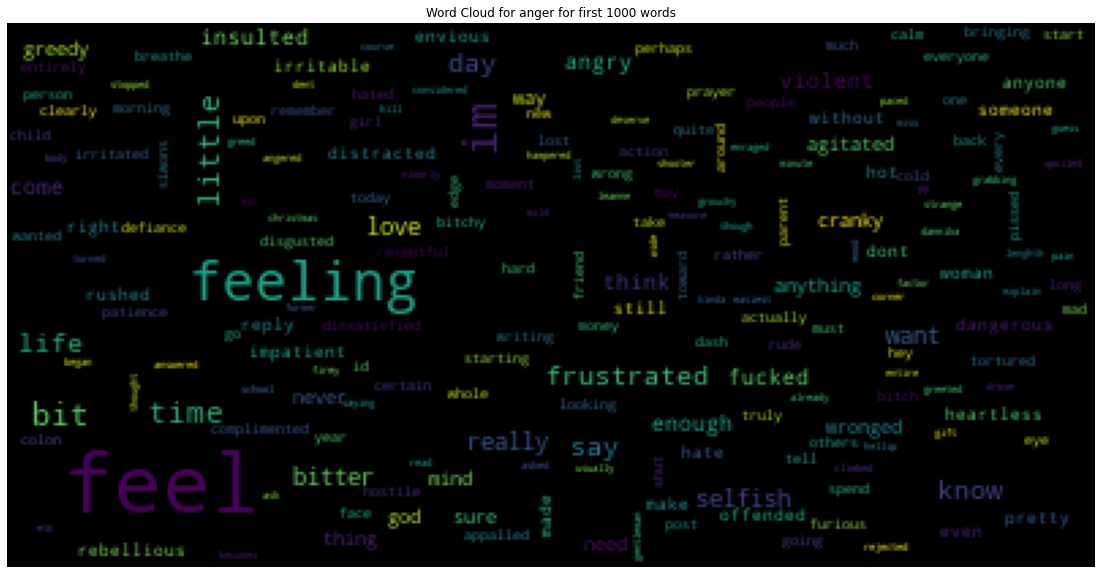

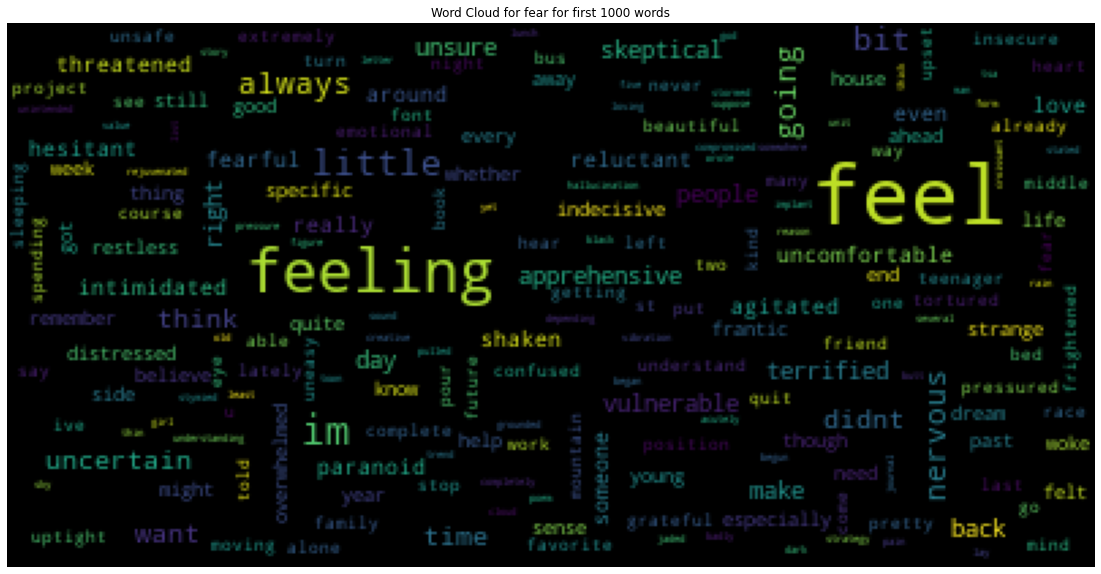

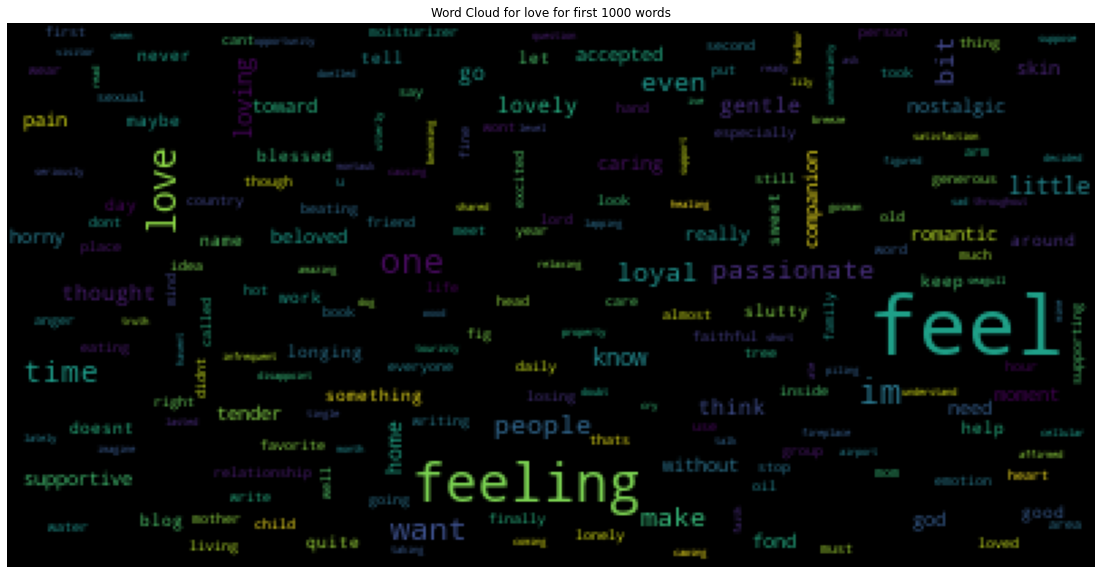

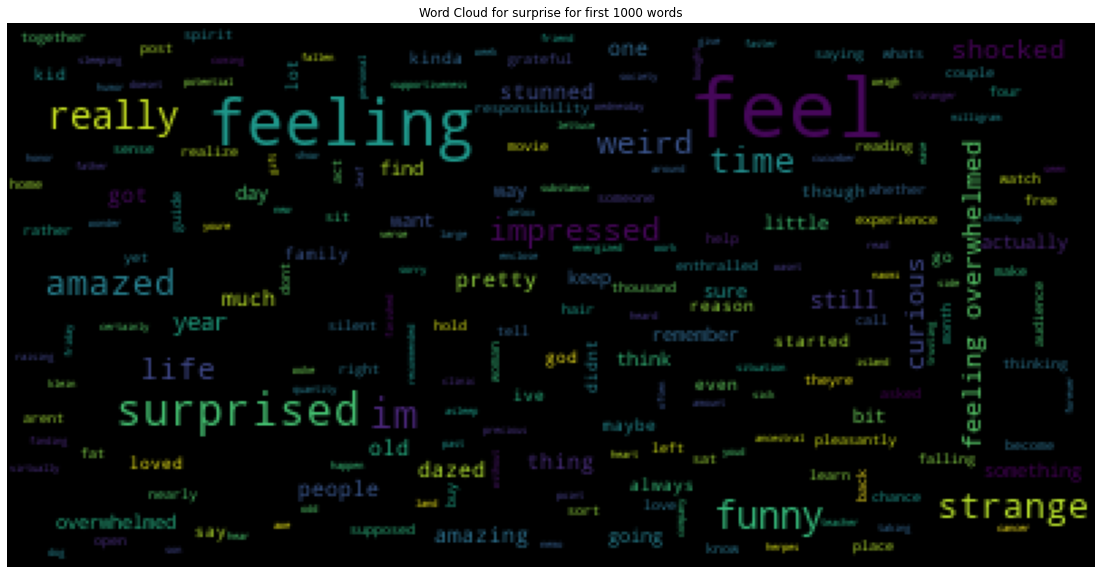

In [51]:
for i in range(len(EM)):
    emotions = EM[i]
    corpus_new1 = create_corpus_df(Data,f'{emotions}')
    plt.figure(figsize=(20,10))
    word_cloud = WordCloud(background_color='black',
                           max_font_size = 30
                          ).generate(" ".join(corpus_new1[:1000]))
    plt.imshow(word_cloud)
    plt.axis('off')
    plt.title(f'Word Cloud for {emotions} for first 1000 words')
    plt.show()

<a id="1"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">4. Creating the Bag of Words model</p>

### 4.1 Creating instance of Count Vectorizer class to create bag of words

In [52]:
cv = TfidfVectorizer(ngram_range=(1,3),binary = True, max_features = 2000)

### 4.2 Vectorizing the Text and generating features for the model

In [53]:
X = cv.fit_transform(Cleaned_Text).toarray()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Creating dictionary of unique words

In [54]:
Dict = cv.vocabulary_

In [55]:
Dict = sorted(Dict,key=Dict.get)
Dict[0:10]

['ability',
 'able',
 'absolutely',
 'abused',
 'accept',
 'acceptable',
 'accepted',
 'accomplished',
 'ache',
 'aching']

### 4.3 Target variable

In [56]:
y = Data.iloc[:, 1].values
y

array(['sadness', 'sadness', 'anger', ..., 'joy', 'joy', 'joy'],
      dtype=object)

In [57]:
le = LabelEncoder()
y = pd.DataFrame(le.fit_transform(y))

### 4.4 Handling the Class Imbalance in data

In [58]:
y.value_counts()

2    6760
4    5797
0    2709
1    2373
3    1641
5     719
dtype: int64

### 4.5 Splitting the datasets into training sets and the test sets

In [59]:
X_train,X_test,y_train,y_test = train_test_split(X, y,test_size=0.3,random_state=0)

In [60]:
X_train.shape 

(13999, 2000)

In [61]:
X_test.shape 

(6000, 2000)

<a id="1"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">5. Building the Models</p>

In [62]:
def Confusion_Matrix(C_M):
    sns.heatmap(C_M, cmap='coolwarm',fmt=".1f",annot=True,annot_kws={'size': 25})
    plt.ylabel('Actual Labels',fontsize=30)
    plt.xlabel('Predicted Labels',fontsize=30) 
    plt.title('Confusion Matrix',fontsize=30)
    plt.tick_params(axis='both', labelsize=25)
    
def Evaluation_of_classifier(y_test, y_predicted):
    print('Accuracy :',100*np.round(accuracy_score(y_test, y_predicted),2),'%')
    print('Error Rate :',100-100*np.round(accuracy_score(y_test, y_predicted),2),'%')
    print('Recall or Sensitivity :',100*recall_score(y_test, y_predicted, average = 'weighted'),'%')
    print('Precision :',100*precision_score(y_test, y_predicted, average = 'weighted'),'%')
    print('F1 Score :',100*f1_score(y_test, y_predicted, average = 'weighted'),'%')

# CAT Boost

In [3]:
%%time
from catboost import CatBoostClassifier
clf = CatBoostClassifier(iterations=500,custom_loss=['Accuracy'])
clf.fit(X_train, y_train,eval_set=(X_test, y_test))

In [120]:
y_predicted = clf.predict(X_test)
Evaluation_of_classifier(y_test, y_predicted)
print('\nClassification Report:\n',classification_report(y_test,y_predicted))

Accuracy : 87.0 %
Error Rate : 13.0 %
Recall or Sensitivity : 87.33333333333333 %
Precision : 87.4242528728993 %
F1 Score : 87.1352456227595 %

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.82      0.87       809
           1       0.86      0.84      0.85       722
           2       0.84      0.94      0.88      2023
           3       0.83      0.69      0.76       480
           4       0.93      0.92      0.92      1746
           5       0.81      0.59      0.68       220

    accuracy                           0.87      6000
   macro avg       0.86      0.80      0.83      6000
weighted avg       0.87      0.87      0.87      6000



In [ ]:
C_M = confusion_matrix(y_test, y_predicted) 
Confusion_Matrix(C_M)

# Light GBM

## 1. Tuning Learning Rate

In [2]:
import lightgbm as lgb
L = np.arange(0.01,0.2,0.01)
Train_acc_100 = []
Test_acc_100  = []
for L1 in L:
    clf = lgb.LGBMClassifier(n_estimators=100,learning_rate=L1,tree_depth=15)
    clf.fit(X_train, y_train,eval_set=(X_test, y_test))
    y_predicted1 = clf.predict(X_train)
    y_predicted2 = clf.predict(X_test)
    Train_acc_100.append(accuracy_score(y_train, y_predicted1))
    Test_acc_100.append(accuracy_score(y_test, y_predicted2))
    
Train_acc_200 = []
Test_acc_200  = []
for L1 in L:
    clf = lgb.LGBMClassifier(n_estimators=200,learning_rate=L1,tree_depth=15)
    clf.fit(X_train, y_train,eval_set=(X_test, y_test))
    y_predicted1 = clf.predict(X_train)
    y_predicted2 = clf.predict(X_test)
    Train_acc_200.append(accuracy_score(y_train, y_predicted1))
    Test_acc_200.append(accuracy_score(y_test, y_predicted2))
    
Train_acc_1000 = []
Test_acc_1000  = []
for L1 in L:
    clf = lgb.LGBMClassifier(n_estimators=1000,learning_rate=L1,tree_depth=15)
    clf.fit(X_train, y_train,eval_set=(X_test, y_test))
    y_predicted1 = clf.predict(X_train)
    y_predicted2 = clf.predict(X_test)
    Train_acc_1000.append(accuracy_score(y_train, y_predicted1))
    Test_acc_1000.append(accuracy_score(y_test, y_predicted2))

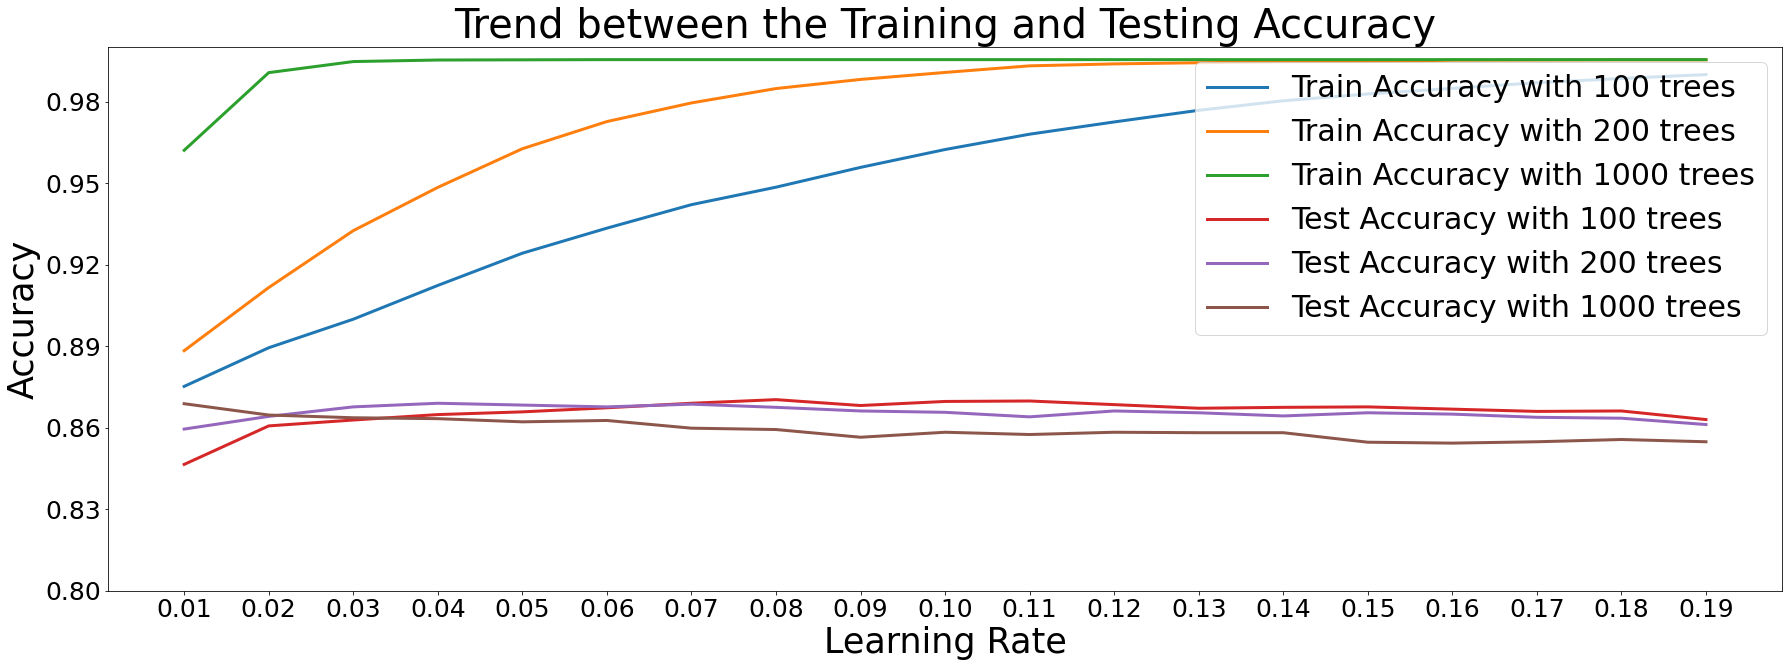

In [111]:
plt.figure(figsize=(30,10))
plt.plot(L,Train_acc_100,linewidth=3,label='Train Accuracy with 100 trees')
plt.plot(L,Train_acc_200,linewidth=3,label='Train Accuracy with 200 trees')
plt.plot(L,Train_acc_1000,linewidth=3,label='Train Accuracy with 1000 trees')
plt.plot(L,Test_acc_100,linewidth=3,label='Test Accuracy with 100 trees')
plt.plot(L,Test_acc_200,linewidth=3,label='Test Accuracy with 200 trees')
plt.plot(L,Test_acc_1000,linewidth=3,label='Test Accuracy with 1000 trees')
plt.title('Trend between the Training and Testing Accuracy',size=40)  
plt.xlabel('Learning Rate',size=35)
plt.ylabel('Accuracy',size=35)
plt.ylim(0.8,1)
plt.xticks(L,size=25)
plt.yticks(np.arange(0.8, 1, 0.03),size=25)
plt.legend(fontsize=30)

## 2. Tuning n_estimators

In [1]:
N = np.arange(100,5000,100)
Train_acc = []
Test_acc  = []
for N1 in N:
    clf = lgb.LGBMClassifier(n_estimators=N1,learning_rate=0.04,max_depth=20)
    clf.fit(X_train, y_train,eval_set=(X_test, y_test))
    y_predicted1 = clf.predict(X_train)
    y_predicted2 = clf.predict(X_test)
    Train_acc.append(accuracy_score(y_train, y_predicted1))
    Test_acc.append(accuracy_score(y_test, y_predicted2))

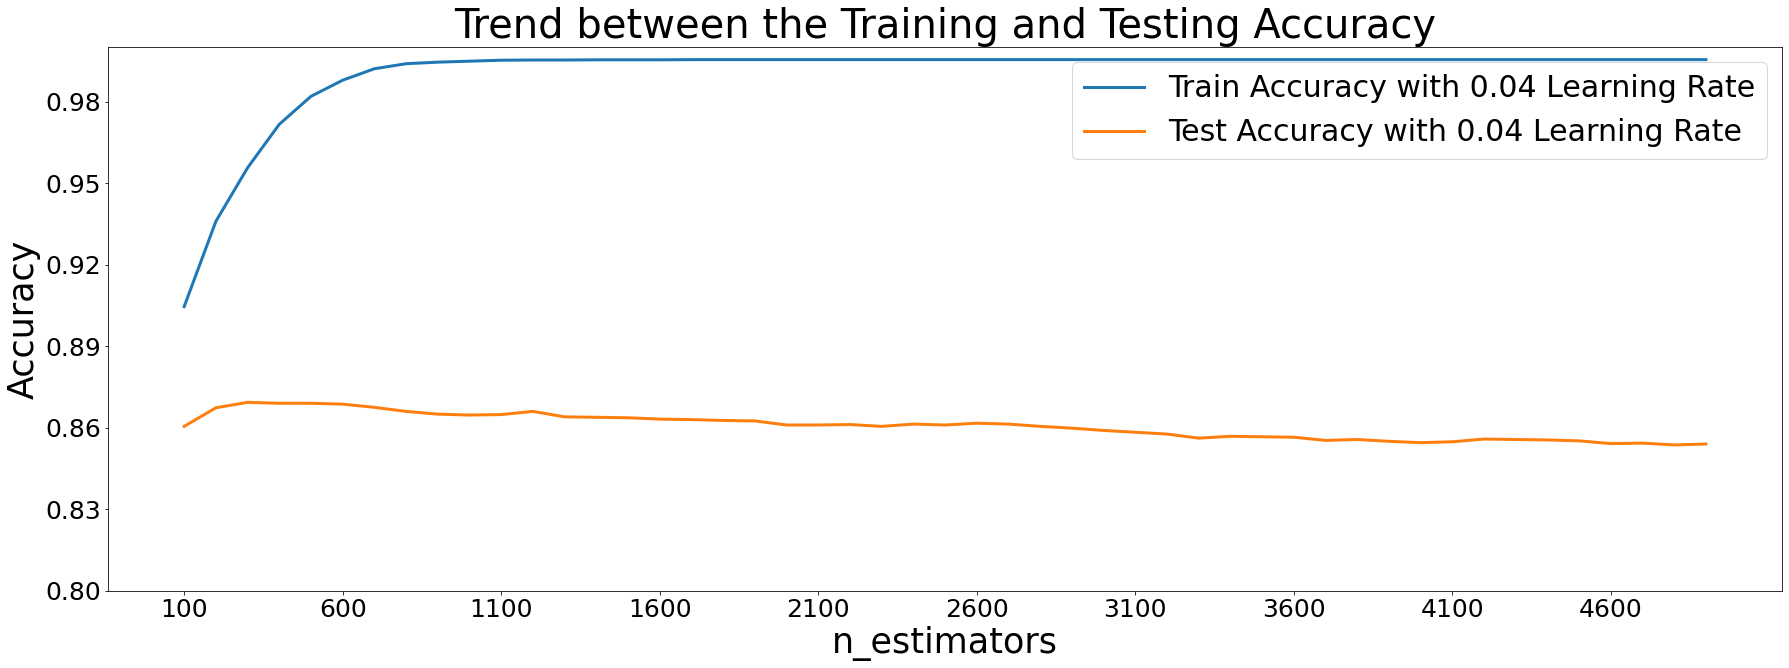

In [144]:
plt.figure(figsize=(30,10))
plt.plot(N,Train_acc,linewidth=3,label='Train Accuracy with 0.04 Learning Rate')
plt.plot(N,Test_acc,linewidth=3,label='Test Accuracy with 0.04 Learning Rate')
plt.title('Trend between the Training and Testing Accuracy',size=40)  
plt.xlabel('n_estimators',size=35)
plt.ylabel('Accuracy',size=35)
plt.ylim(0.8,1)
plt.xticks(np.arange(100,5000,500),size=25)
plt.yticks(np.arange(0.8, 1, 0.03),size=25)
plt.legend(fontsize=30)

In [4]:
%%time
clf = lgb.LGBMClassifier(n_estimators=200,learning_rate=0.04,max_depth=20)
clf.fit(X_train, y_train,eval_set=(X_test, y_test))
y_predicted = clf.predict(X_test)

In [146]:
y_predicted = clf.predict(X_test)
Evaluation_of_classifier(y_test, y_predicted)
print('\nClassification Report:\n',classification_report(y_test,y_predicted))

Accuracy : 87.0 %
Error Rate : 13.0 %
Recall or Sensitivity : 86.73333333333333 %
Precision : 87.00062715721955 %
F1 Score : 86.71158195945799 %

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.80      0.84       809
           1       0.84      0.84      0.84       722
           2       0.84      0.92      0.88      2023
           3       0.78      0.80      0.79       480
           4       0.94      0.88      0.91      1746
           5       0.78      0.67      0.72       220

    accuracy                           0.87      6000
   macro avg       0.85      0.82      0.83      6000
weighted avg       0.87      0.87      0.87      6000



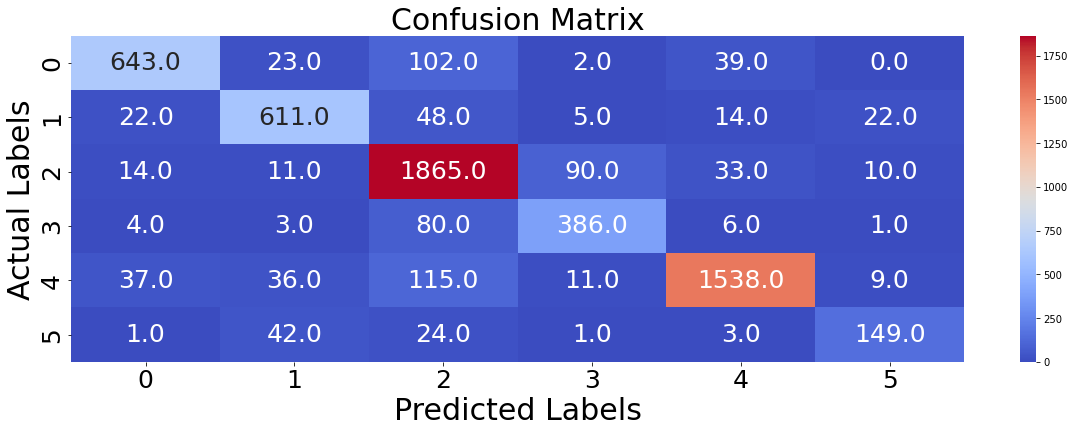

In [136]:
C_M = confusion_matrix(y_test, y_predicted) 
Confusion_Matrix(C_M)

<a id="1"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;"> The End </p>